Revenue => class whether it can make a revenue or not

Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related - Duration => represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.

Bounce Rate => percentage of visitors who enter the site from that page and then leave (“bounce”) without triggering any other requests to the analytics server during that session

Exit Rate => the percentage that were the last in the session

Page Value => feature represents the average value for a web page that a user visited before completing an e-commerce transaction

Special Day => indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine’s Day) in which the sessions are more likely to be finalized with transaction. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero,before and after this date unless it is close to another special day, and its maximum value of 1 on February 8

Operating system,browser, region, traffic type => Different types of operating systems, browser, region and traffic type used to visit the website

Visitor type => Whether the customer is a returning or new visitor

Weekend => A Boolean value indicating whether the date of the visit is weekend

Month => Month of the year.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [7]:
df = pd.read_csv('Data\online_shoppers_intention_cleaned.csv', index_col=0)

In [8]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Season', 'Product_Duration', 'Special'],
      dtype='object')

In [31]:
df.BounceRates.value_counts()

0.000000    5507
0.200000     667
0.066667     134
0.028571     115
0.050000     112
            ... 
0.004704       1
0.024872       1
0.006409       1
0.014198       1
0.010918       1
Name: BounceRates, Length: 1872, dtype: int64

In [99]:
features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'PageValues', 'BounceRates', 'ExitRates']

In [80]:
df_features = df[features]

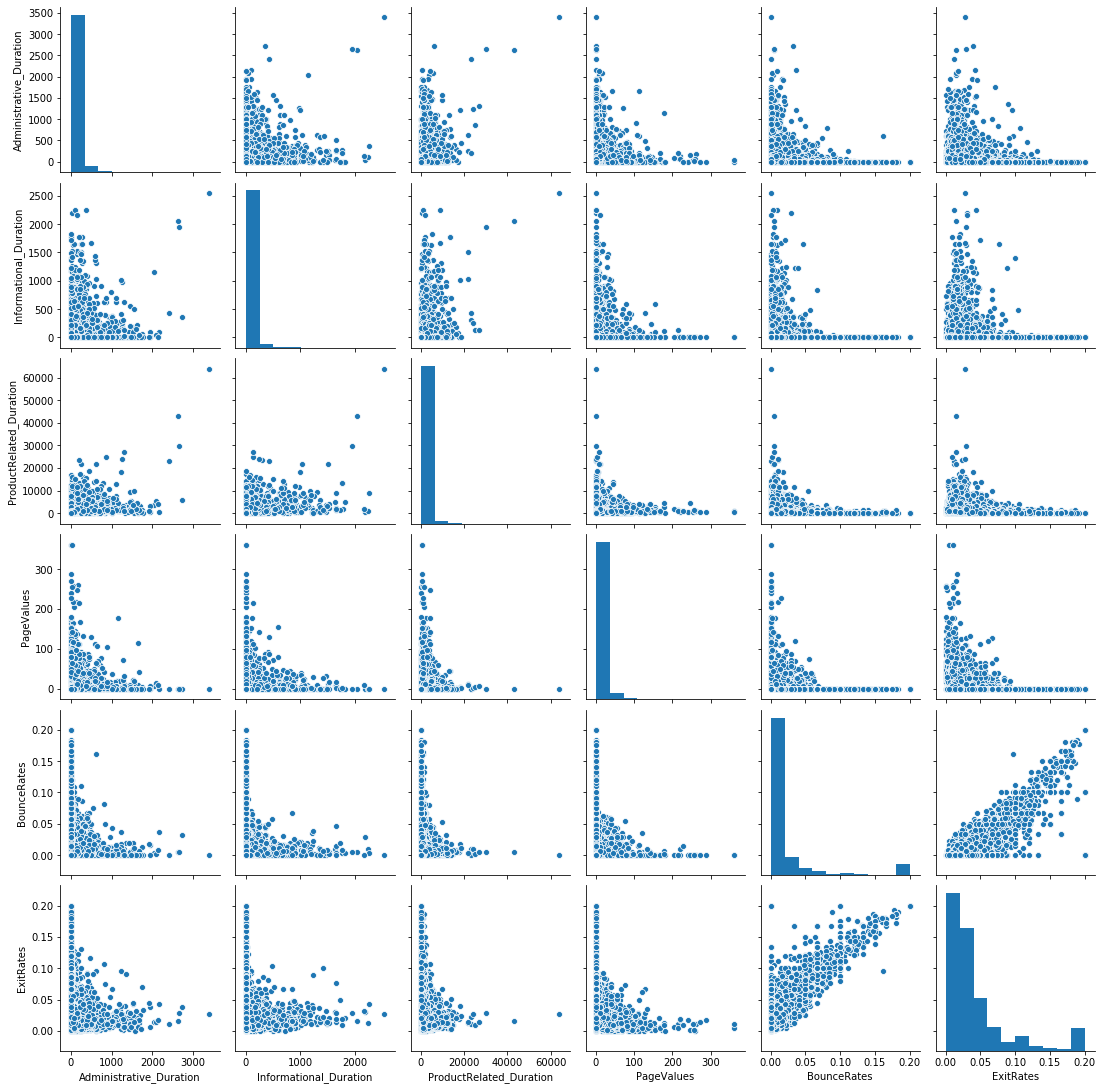

In [81]:
sns.pairplot(df_features)

In [100]:
# preprocess the data 
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Revenue']].values

In [101]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [104]:
# create principal components 
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2',
                                                                 'principal component 3','principal component 4',
                                                                 'principal component 5','principal component 6'])

In [105]:
pca.explained_variance_ratio_

array([0.37267244, 0.22736296, 0.1596819 , 0.12582285, 0.10052434,
       0.01393551])

In [106]:
pca.explained_variance_

array([2.23621669, 1.36428883, 0.95816943, 0.75499857, 0.60319515,
       0.08361985])

In [107]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,-4.517468,2.094864,0.746057,-0.215557,0.150544,-0.296818
1,-0.939259,-0.336776,-0.244429,0.143305,-0.174504,1.120410
2,-2.026445,0.370487,0.040576,0.042741,-0.101274,0.989293
3,-0.450680,-0.395558,-0.303782,0.147857,0.051692,0.094564
4,-0.182133,-0.735234,-0.370340,0.176436,-0.169329,-0.234901


In [108]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_
# print(eig_values)
print(eig_vectors)

[[ 3.27546018e-01  2.55076552e-01  3.74059556e-01  1.76152497e-01
  -5.58018022e-01 -5.87635255e-01]
 [ 4.31354776e-01  5.37751189e-01  4.70695938e-01 -1.09663564e-01
   4.07877432e-01  3.53287352e-01]
 [ 4.62711378e-02 -1.13875059e-02 -4.37379831e-02  9.74994828e-01
   1.78028634e-01  1.16220423e-01]
 [-7.25312785e-01  6.81476632e-01 -1.45781430e-02  5.83886667e-02
  -6.78838558e-02 -3.57908654e-02]
 [-4.21152165e-01 -4.25698599e-01  7.96608980e-01  3.44580563e-02
   6.66474411e-02  3.45897477e-02]
 [ 3.25247962e-02  4.88502123e-04  4.25838248e-02  4.16256210e-02
  -6.93907482e-01  7.16859980e-01]]


In [109]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]

In [110]:
print(pc1)

[ 0.32754602  0.25507655  0.37405956  0.1761525  -0.55801802 -0.58763525]


In [111]:
print(pc2)

[ 0.43135478  0.53775119  0.47069594 -0.10966356  0.40787743  0.35328735]


In [114]:
# get the loadings
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=features)
# str_loading_1

In [115]:
str_loading_1.sort_values(ascending=False)

ProductRelated_Duration    0.559368
Administrative_Duration    0.489812
Informational_Duration     0.381441
PageValues                 0.263418
BounceRates               -0.834459
ExitRates                 -0.878749
dtype: float64

Text(0, 0.5, 'proportion of explained variance')

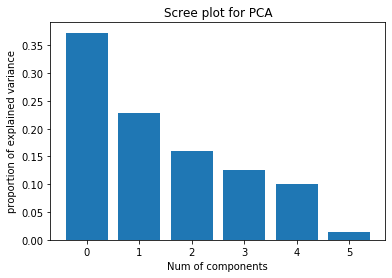

In [118]:
index = np.arange(6)
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
plt.ylabel('proportion of explained variance')

Text(0, 0.5, 'explained variance ratio')

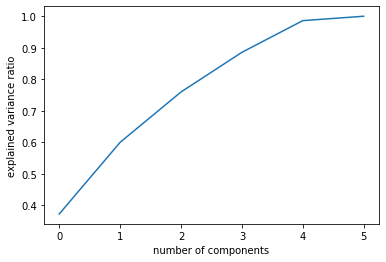

In [119]:
# plotting screeplots 
#print(pca.explained_variance_ratio_)
#print(pca.explained_variance_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')